In [1]:
import os
import json
import hashlib
import numpy as np
from qcelemental import constants
import psi4
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
from functions import zetacolors, extrapolations, getFuncPars, prettifyBasis, prettifyFunc

In [2]:
with open(os.path.join("..", "external", "ncdt_2.1.json"), "r") as infile:
    refdata = json.load(infile)

In [3]:
refstructs = {}
fns = os.listdir(os.path.join("..", "external", "ncdt"))
for fn in fns:
    if fn.endswith("xyz"):
        with open(os.path.join("..", "external", "ncdt", fn), "r") as infile:
            xyzdata = infile.read()
            refstructs[fn[:-4]] = psi4.geometry(xyzdata)

In [4]:
for geom in refdata:
    for bond in refdata[geom]:
        bond.append(refstructs[geom].distance_matrix().np[bond[1]-1][bond[2]-1] * constants.bohr2angstroms)

In [5]:
results = {}
rfns = os.listdir(os.path.join("..", "data", "NCDT"))
for fn in rfns:
    if fn.endswith("xyz"):
        with open(os.path.join("..", "data", "NCDT", fn), "r") as infile:
            xyzdata = infile.read()
            tagl = xyzdata.split("\n")[1]
            fctl, rest = tagl.split("/")
            if fctl == "cam-b3lyp-d3bj":
                continue
            basis, rest = rest.split(":")
            geom = rest[:-4]
            #if geom in ["HCN-H2CO-rSE"]:#, "CS2-OCS-rSE", "Xe-OCS-rm2", "Kr-OCS-rSE"]:
            #    continue
            mol = psi4.geometry(xyzdata)
            if fctl not in results:
                results[fctl] = {}
            if basis not in results[fctl]:
                results[fctl][basis] = {}
            geomdevs = []
            for bond in refdata[geom]:
                bl = mol.distance_matrix().np[bond[1]-1][bond[2]-1] * constants.bohr2angstroms
                diff = bond[-1] - bl
                geomdevs.append(diff)
            if geom == "HCN-H2CO-rSE":
                print(fctl, basis, geomdevs)
            results[fctl][basis][geom] = geomdevs

b3lyp-d3bj def2-[st]zvpd [0.05607661234653882, 0.3210343321009832, 0.39097709760655786]
revpbe-d3bj def2-qzvpd [0.013720923603797175, 0.4232138219191892, 0.5211180795748884]
pbe0-d3 def2-tzvpd [0.06008944879840916, 0.32747702440994164, 0.39754405946117455]
pbe0-d3 def2-svpd [0.08574347330282128, 0.42966668466374713, 0.5085907923049868]
revpbe-d3bj def2-[st]zvpd [0.010498654033991084, 0.4312187258163269, 0.5319053107853735]
b3lyp-d3bj def2-svpd [0.08520063136563572, 0.448983225917825, 0.5318504240569437]
b3lyp-d3bj def2-qzvpd [0.05425304751536286, 0.27191753565220367, 0.33099461183183543]
b97m-d3bj def2-qzvpd [0.02560585215864819, 0.22099859520272114, 0.27234795624263075]
b97m-d3bj def2-svpd [0.09801008417098744, 0.7127018055662546, 0.8961676571247628]
revpbe-d3bj def2-svpd [0.03759767188028196, 0.49930305286637644, 0.596831443315299]
b3lyp-d3bj def2-tzvpd [0.05594759709553365, 0.3213344918045826, 0.39212136318585067]
wb97x-d3bj def2-tzvpd [0.05052873382667311, 0.4634322671053219, 0.584

In [6]:
for fctl in results:
    for basis in sorted(results[fctl].keys()):
        if len(results[fctl][basis]) < 16 and False:
            pass
        else:
            mads = []
            geoms = sorted(results[fctl][basis].keys())
            for geom in geoms:
                mad = np.mean([abs(dev) for dev in results[fctl][basis][geom]])
                mads.append(mad)
            print(f"{fctl + '/' + basis:30s}: {np.sum(mads):5.3f} "
                  f"{np.max(mads):5.3f} {geoms[np.argmax(mads)]:20s} {len(mads):2d}")

b3lyp-d3bj/def2-[st]zvpd      : 0.881 0.256 HCN-H2CO-rSE         17
b3lyp-d3bj/def2-qzvpd         : 0.846 0.219 HCN-H2CO-rSE         17
b3lyp-d3bj/def2-svpd          : 1.235 0.355 HCN-H2CO-rSE         17
b3lyp-d3bj/def2-tzvpd         : 0.892 0.256 HCN-H2CO-rSE         17
pbe0-d3/def2-[st]zvpd         : 1.115 0.262 HCN-H2CO-rSE         17
pbe0-d3/def2-qzvpd            : 1.106 0.244 HCN-H2CO-rSE         17
pbe0-d3/def2-svpd             : 1.357 0.341 HCN-H2CO-rSE         17
pbe0-d3/def2-tzvpd            : 1.093 0.262 HCN-H2CO-rSE         17
revpbe-d3bj/def2-[st]zvpd     : 2.452 0.325 HCN-H2CO-rSE         17
revpbe-d3bj/def2-qzvpd        : 2.385 0.319 HCN-H2CO-rSE         17
revpbe-d3bj/def2-svpd         : 2.126 0.378 HCN-H2CO-rSE         17
revpbe-d3bj/def2-tzvpd        : 2.452 0.324 HCN-H2CO-rSE         17
b97m-d3bj/def2-[st]zvpd       : 1.250 0.241 HCN-H2CO-rSE         17
b97m-d3bj/def2-qzvpd          : 1.196 0.173 HCN-H2CO-rSE         17
b97m-d3bj/def2-svpd           : 1.758 0.569 HCN-

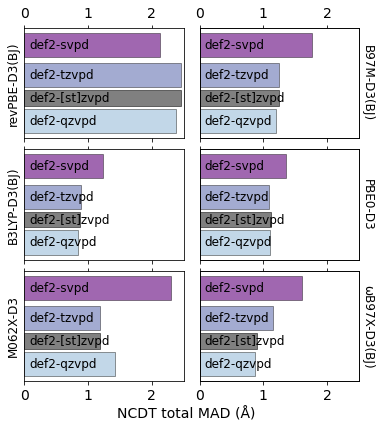

In [7]:
fig, ax = plt.subplots(figsize=(6,6.5))
grid = plt.GridSpec(3, 2, wspace=0.1, hspace=0.1, figure=fig)
ax = []
ax.append(plt.subplot(grid[0:1, 0:1]))
ax.append(plt.subplot(grid[0:1, 1:2]))
ax.append(plt.subplot(grid[1:2, 0:1]))
ax.append(plt.subplot(grid[1:2, 1:2]))
ax.append(plt.subplot(grid[2:3, 0:1]))
ax.append(plt.subplot(grid[2:3, 1:2]))

ai = 0
for fctl in ["revpbe-d3bj", "b97m-d3bj", "b3lyp-d3bj", "pbe0-d3",  "m062x-d3", "wb97x-d3bj"]:        
    fctltmad = []
    for basis in ["def2-svpd", "def2-tzvpd", "def2-qzvpd", "def2-[st]zvpd"]:
        mads = []
        for geom in results[fctl][basis].keys():
            mad = np.mean([abs(dev) for dev in results[fctl][basis][geom]])
            mads.append(mad)
        fctltmad.append(np.sum(mads))
    ax[ai].barh([2.5,1.5,0.], fctltmad[:-1], color= [zetacolors[i] for i in ["def2-svpd", "def2-tzvpd", "def2-qzvpd"]],
                edgecolor="k", linewidth=0.5, height=0.8, zorder=1, alpha=0.8)
    ax[ai].barh(0.75, fctltmad[-1], color="0.5", edgecolor="k", height=0.5, zorder=1, alpha=1, linewidth=0.5)
    ax[ai].set_xlim(left=0, right=2.5)
    
    if ai % 2 == 0:
        ax[ai].tick_params(labelleft=True)
        ax[ai].set_ylabel(prettifyFunc(fctl), fontsize=12)
        
    else:
        ax[ai].tick_params(labelright=True)
        ty = ax[ai].twinx()
        ty.tick_params(bottom=False, top=False, left=False, right=False, 
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        ty.set_ylabel(prettifyFunc(fctl), fontsize=12, rotation=270, labelpad=15)
    
    ax[ai].tick_params(axis="y",direction="in", pad=-5)
    ax[ai].tick_params(bottom=True, top=True, left=False, right=False, 
                       labelbottom=False, labeltop=False, labelleft=True, labelright=False)
    ax[ai].set_yticks([0,0.75,1.5,2.5])
    ax[ai].tick_params(axis="y",direction="in", pad=-5)
    ax[ai].set_yticklabels(["def2-svpd", "def2-tzvpd", "def2-[st]zvpd", "def2-qzvpd"][::-1], 
                           horizontalalignment = "left", fontsize=12, verticalalignment="center")
    ai += 1
ax[0].tick_params(labeltop=True)
ax[1].tick_params(labeltop=True)
ax[-2].tick_params(labelbottom=True)
ax[-1].tick_params(labelbottom=True)
fig.text(0.5, 0.04, "NCDT total MAD (Å)", ha="center", va="bottom")
fig.savefig(os.path.join("..","output","fig_ncdt.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")